## LLM on a Living Brain -- Creating a Simulated Elon Musk on X 

### Project Overview

This notebook contains a demo code for simulating Elon Musk on X (Twitter) through a sophisticated dual-system architecture.

Bridging artificial intelligence with living neural networks

#### Two Main Components

##### 1. Consciousness: Linguistic Intelligence
**Model**: Llama 3.3 70B
**Method**: LoRA fine-tuning
**Training Data**: 50K tweets from Elon Musk's X timeline

##### 2. Subconsciousness: Neural Organoid System
**Composition**: Four living brain organoids from FinalSpark
**Technology**: Programmable electric trigger and output reading system

#### Technical Details

| Component | Specification |
|-----------|---------------|
| LLM Model | Llama 3.3 70B with LoRA Fine-tuning|
| Neural Interface | 4-Organoid Programmable System for Subconsciousness modeling|



In [95]:
%autoawait asyncio
from datetime import timedelta, datetime, timezone
import numpy as np
import time
from neuroplatformv2.core.trigger import TriggerController
from neuroplatformv2.core.database import (
    DatabaseController,
    TriggersQuery,
    SpikeCountQuery,
    SpikeEventQuery,
    RawSpikeQuery,
    get_raw_spike,
)
from neuroplatformv2.core.intan import IntanController
from neuroplatformv2.utils.schemas import (
    StimParam,
    StimPolarity,
    StartRawRecordingRequest,
)

from src.organoid import OrganoidSystem
from src.elon_v7_final import MuskResponseGenerator
generator = MuskResponseGenerator()

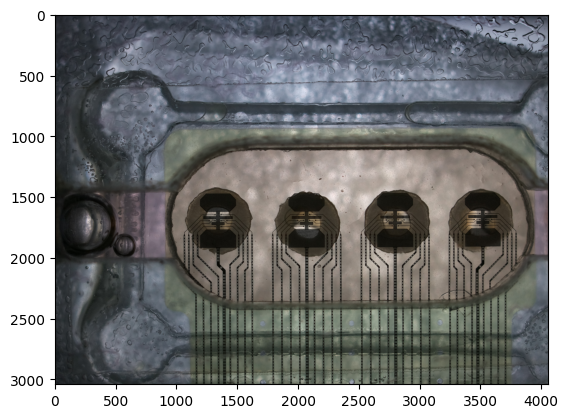

In [96]:
### Display the current snapshot of the organoid system using still camera 


from neuroplatformv2.core.camera import CameraController
from neuroplatformv2.utils.enumerations import MEA
import matplotlib.pyplot as plt

cam = CameraController(mea=MEA.Eight)
lastcapture = await cam._last_capture()
if len(lastcapture) > 0:
    lastcapture = lastcapture.iloc[0]["id"]
    img = cam._image_from(lastcapture)
    plt.imshow(img)

plt.savefig("organoid_snapshot.png")

In [97]:
## Initializing the system twice will crash it. Needs to re-start intan service before re-initializing the OrganoidSystem. 
global system
system = OrganoidSystem()
await system.initialize_system()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


System initialized successfully


True

In [ ]:
import json
from datetime import datetime
import time
import asyncio
import requests
import nest_asyncio
import tweepy
from requests_oauthlib import OAuth1
#from src.config import consumer_key, consumer_secret, access_token, access_token_secret
#from src.xapi import check_rate_limit, get_user_id
from src.elon_v7_final import MuskResponseGenerator
from src.e2 import get_all_home_timeline_tweets

# Apply nest_asyncio to allow async/await in Jupyter
nest_asyncio.apply()

# Import the SimplifiedTwitterBot (save the code from the artifact to a file first)
from src.e1_organoid import AsyncTwitterBot 

# Initialize the Twitter bot
twitter_bot = AsyncTwitterBot()


# Initialize your response generator
generator = MuskResponseGenerator()

# Main script
## Get the timeline data from X 
tweets = get_all_home_timeline_tweets(max_results=1)
print("\n=== Timeline data ===")

for tweet in tweets:
    created_at = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
    
    print("\n" + "="*50)
    print(f"id: {tweet['id']}")
    print(f"Created at: {created_at}")
    print(f"Tweet content: {tweet['text']}")
    
    print(f"Processing tweet: {tweet}")
    # Compute triggers for the tweet
    trigger_values = system.compute_tweet_triggers(tweet['text'])
    # Send the computed triggers
    await system.send_triggers(trigger_values)
    print(f"Trigger values sent: {trigger_values}")
    
    # Get organoid response
    print(f"Reading latest organoid activities ..")
    organoid_response = await system.get_organoid_status(seconds=5)
    time.sleep(1) # wait until we see organoid responses on IntanRHX
    
    # Use Fine-tuned Llama3.3 70B to generate a response
    print("Generating contextual LLM response using Llama 3.3 70B + Organoid response..")
    response = generator.generate_response_with_timeout(tweet['text'], organoid_response=organoid_response)
    print(f"LLM Response: {response}" if response else "[No response]")
    
    # Add the generated reply to the tweet data
    tweet['generated_reply'] = response
    
    # Post the response as a reply using the TwitterBot
    if response:
        action_probabilities = {
        'reply': 0.50,   # 50% chance
        'quote': 0.50,   # 50% chance 
        'retweet': 0.0   # 0% chance (disabled)
        ### Only for demo ###
        ### Deployed agent chooses these actions based on timeline average ###
        }
        
        # Select an action based on the probabilities
        import random
        action_type = random.choices(
            list(action_probabilities.keys()),
            weights=list(action_probabilities.values())
        )[0]
        
        print(f"Selected action type: {action_type}")
        
        # Execute the chosen action
        success = await twitter_bot.async_choose_and_execute_action(
        tweet_id=tweet['id'],
        text=tweet['text'],
        response=response,
        action_type=action_type
        )
        
        if success:
            print(f"Successfully posted {action_type} to tweet {tweet['id']}")
        else:
            print(f"Failed to post {action_type} to tweet {tweet['id']}")



Tweet 1 (@elonmusk):
ID: 1910915784475333094
Content: Exactly
--------------------------------------------------------------------------------
Tweet 2 (@elonmusk):
ID: 1910864459532230933
Content: When the scams run for long enough with no one paying attention, they literally send zero dollars to the kids. Zero. 

Many times, I have asked for pictures of the funding recipients. Sometimes, they can’t even come up with a single picture.
--------------------------------------------------------------------------------

=== Timeline data ===

id: 1910915784475333094
Created at: 2025-04-12 04:40:00+00:00
Tweet content: Exactly
Processing tweet: {'id': '1910915784475333094', 'text': 'Exactly', 'username': 'elonmusk', 'created_at': 'Sat Apr 12 04:40:00 +0000 2025'}
Emotional Organoid input: 0.999, Active Electrodes: [3, 5, 6, 7]
Linguistic Organoid input: 0.583, Active Electrodes: [2, 3, 4, 5]
Memory Organoid input: -1.000, Active Electrodes: [5]
Attention Organoid input: -1.000, Active Electr

In [80]:
from src.elon_v7_final import MuskResponseGenerator
generator = MuskResponseGenerator()

# Define test tweets
tweets = [
    "JUST ANNOUNCED: Approval ratings for the Democrat Party falls even further, from 29% to 27%",
    "A Mordor judge has just ruled that you have to give due process to the orcs.",
    "One of the 7 federal agencies shuttered by DOGE on Friday is the most DOGE-able agency of all time.  FMCS (before the pandemic!) had a 9-story K Street tower for 60 employees. Its halls were lined with oil paintings of those employees, and other art purchased from the boss's wife"
]

for tweet in tweets:
    print(f"Processing tweet: {tweet}")

    
    # Compute triggers for the tweet
    trigger_values = system.compute_tweet_triggers(tweet)

    # Send the computed triggers
    await system.send_triggers(trigger_values)
    print(f"Trigger values sent: {trigger_values}")
    
    # Get organoid response
    print(f"Reading latest organoid activities ..")
    organoid_response = await system.get_organoid_status(seconds=5)
    time.sleep(1) # wait until we see organoid responses on IntanRHX
    
    
    # Use Fine-tuned Llama3.3 70B to generate a response
    print("Generating contextual LLM response ..")
    response = generator.generate_response_with_timeout(tweet, organoid_response=organoid_response)
    
    

    # Print tweet and trigger details
    
    
    
    print(f"LLM Response: {response}" if response else "[No response]")
    print("\n" + "="*50)
    time.sleep(2)

Processing tweet: JUST ANNOUNCED: Approval ratings for the Democrat Party falls even further, from 29% to 27%
Emotional Organoid input: -0.999, Active Electrodes: [0]
Linguistic Organoid input: 0.768, Active Electrodes: [4]
Memory Organoid input: -0.900, Active Electrodes: [7]
Attention Organoid input: -0.667, Active Electrodes: [1]
Trigger values sent: [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Reading latest organoid activities ..
Generating contextual LLM response ..
Tweet relevance assessment: False
Tweet skipped - not relevant to Elon's core interests
[No response]

Processing tweet: A Mordor judge has just ruled that you have to give due process to the orcs.
Emotional Organoid input: -0.944, Active Electrodes: [7]
Linguistic Organoid input: 0.717, Active Electrodes: [7, 5, 1, 2, 4]
Memory Organoid input: -0.889, Active Electrodes: [6]
Attention Organoid input: -1.000, Active Electrodes: [5]
Trigger values sent: [0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1]
Reading latest organoid activities ..
Genera